# Project : Multi-class Object Detection using Transfer Learning (Stanford Dogs Dataset) #

Samuel METIN , Maxime APARICIO

### Abstract :

This project investigates fine-grained multi-class object detection on the Stanford Dogs Dataset. The objective is to detect and classify multiple dog breeds within images by adapting a pre-trained Faster R-CNN model. Indeed, this pretrained model (on COCO) can detect and classify general objects (dogs, people, cars, trucks, etc.), but cannot distinguish specific breeds of dogs.

The model is fine-tuned by unfreezing only the fourth layer of the backbone and the ROI heads, which significantly reduces computational cost. As a result, the full training process required only about ten minutes. Although the model could potentially be further improved through data augmentation, but it already provides satisfactory results and demonstrates the efficiency of partial fine-tuning.

Performance is evaluated using COCO-style metrics, including mean Average Precision (mAP) across multiple IoU thresholds. Finally, visual inspection confirms accurate bounding box placement and high classification accuracy on test samples.

### StanfordDogs Dataset

In [1]:
!mkdir StanfordDogs
!wget http://vision.stanford.edu/aditya86/ImageNetDogs/images.tar && tar -xf images.tar -C StanfordDogs
!wget http://vision.stanford.edu/aditya86/ImageNetDogs/annotation.tar && tar -xf annotation.tar -C StanfordDogs

--2026-02-15 17:38:07--  http://vision.stanford.edu/aditya86/ImageNetDogs/images.tar
Resolving vision.stanford.edu (vision.stanford.edu)... 171.64.68.10
Connecting to vision.stanford.edu (vision.stanford.edu)|171.64.68.10|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 793579520 (757M) [application/x-tar]
Saving to: ‘images.tar’

images.tar          100%[===================>] 756.82M  9.10MB/s    in 1m 57s  

2026-02-15 17:40:04 (6.47 MB/s) - ‘images.tar’ saved [793579520/793579520]

--2026-02-15 17:40:09--  http://vision.stanford.edu/aditya86/ImageNetDogs/annotation.tar
Resolving vision.stanford.edu (vision.stanford.edu)... 171.64.68.10
Connecting to vision.stanford.edu (vision.stanford.edu)|171.64.68.10|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 21852160 (21M) [application/x-tar]
Saving to: ‘annotation.tar’

annotation.tar      100%[===================>]  20.84M  4.81MB/s    in 9.4s    

2026-02-15 17:40:18 (2.22 MB/s) - ‘annotat

### Problem - too much classes : 120 dog breeds -> 4 families of 5 close dog breeds

### Retreivers :

n02099267-flat-coated_retriever

n02099601-golden_retriever

n02099712-Labrador_retriever

n02099849-Chesapeake_Bay_retriever

### Levriers :

n02090622-borzoi

n02091032-Italian_greyhound

n02091134-whippet

n02091831-Saluki

### Terriers :

n02096177-cairn

n02096294-Australian_terrier

n02094114-Norfolk_terrier

n02094258-Norwich_terrier

### Bull :

n02096585-Boston_bull

n02108915-French_bulldog

n02110958-pug

n02112706-Brabancon_griffon


In [2]:
# Create the directory tree
!mkdir StanfordDogs_final StanfordDogs_final/Images StanfordDogs_final/Annotation

!mkdir StanfordDogs_final/Images/Retriever StanfordDogs_final/Annotation/Retriever
!mkdir StanfordDogs_final/Images/Levrier StanfordDogs_final/Annotation/Levrier
!mkdir StanfordDogs_final/Images/Terrier StanfordDogs_final/Annotation/Terrier
!mkdir StanfordDogs_final/Images/Bull StanfordDogs_final/Annotation/Bull

In [3]:
# Retriever
!cp -r StanfordDogs/Images/n02099267-flat-coated_retriever/* StanfordDogs_final/Images/Retriever
!cp -r StanfordDogs/Annotation/n02099267-flat-coated_retriever/* StanfordDogs_final/Annotation/Retriever

!cp -r StanfordDogs/Images/n02099601-golden_retriever/* StanfordDogs_final/Images/Retriever
!cp -r StanfordDogs/Annotation/n02099601-golden_retriever/* StanfordDogs_final/Annotation/Retriever

!cp -r StanfordDogs/Images/n02099712-Labrador_retriever/* StanfordDogs_final/Images/Retriever
!cp -r StanfordDogs/Annotation/n02099712-Labrador_retriever/* StanfordDogs_final/Annotation/Retriever

!cp -r StanfordDogs/Images/n02099849-Chesapeake_Bay_retriever/* StanfordDogs_final/Images/Retriever
!cp -r StanfordDogs/Annotation/n02099849-Chesapeake_Bay_retriever/* StanfordDogs_final/Annotation/Retriever

# Levrier
!cp -r StanfordDogs/Images/n02090622-borzoi/* StanfordDogs_final/Images/Levrier
!cp -r StanfordDogs/Annotation/n02090622-borzoi/* StanfordDogs_final/Annotation/Levrier

!cp -r StanfordDogs/Images/n02091032-Italian_greyhound/* StanfordDogs_final/Images/Levrier
!cp -r StanfordDogs/Annotation/n02091032-Italian_greyhound/* StanfordDogs_final/Annotation/Levrier

!cp -r StanfordDogs/Images/n02091134-whippet/* StanfordDogs_final/Images/Levrier
!cp -r StanfordDogs/Annotation/n02091134-whippet/* StanfordDogs_final/Annotation/Levrier

!cp -r StanfordDogs/Images/n02091831-Saluki/* StanfordDogs_final/Images/Levrier
!cp -r StanfordDogs/Annotation/n02091831-Saluki/* StanfordDogs_final/Annotation/Levrier

# Terrier
!cp -r StanfordDogs/Images/n02096177-cairn/* StanfordDogs_final/Images/Terrier
!cp -r StanfordDogs/Annotation/n02096177-cairn/* StanfordDogs_final/Annotation/Terrier

!cp -r StanfordDogs/Images/n02096294-Australian_terrier/* StanfordDogs_final/Images/Terrier
!cp -r StanfordDogs/Annotation/n02096294-Australian_terrier/* StanfordDogs_final/Annotation/Terrier

!cp -r StanfordDogs/Images/n02094114-Norfolk_terrier/* StanfordDogs_final/Images/Terrier
!cp -r StanfordDogs/Annotation/n02094114-Norfolk_terrier/* StanfordDogs_final/Annotation/Terrier

!cp -r StanfordDogs/Images/n02094258-Norwich_terrier/* StanfordDogs_final/Images/Terrier
!cp -r StanfordDogs/Annotation/n02094258-Norwich_terrier/* StanfordDogs_final/Annotation/Terrier

# Bull
!cp -r StanfordDogs/Images/n02096585-Boston_bull/* StanfordDogs_final/Images/Bull
!cp -r StanfordDogs/Annotation/n02096585-Boston_bull/* StanfordDogs_final/Annotation/Bull

!cp -r StanfordDogs/Images/n02108915-French_bulldog/* StanfordDogs_final/Images/Bull
!cp -r StanfordDogs/Annotation/n02108915-French_bulldog/* StanfordDogs_final/Annotation/Bull

!cp -r StanfordDogs/Images/n02110958-pug/* StanfordDogs_final/Images/Bull
!cp -r StanfordDogs/Annotation/n02110958-pug/* StanfordDogs_final/Annotation/Bull

!cp -r StanfordDogs/Images/n02112706-Brabancon_griffon/* StanfordDogs_final/Images/Bull
!cp -r StanfordDogs/Annotation/n02112706-Brabancon_griffon/* StanfordDogs_final/Annotation/Bull

In [4]:
# Number of examples by class

! ls -1 StanfordDogs_final/Images/Retriever | wc -l
! ls -1 StanfordDogs_final/Images/Levrier | wc -l
! ls -1 StanfordDogs_final/Images/Terrier | wc -l
! ls -1 StanfordDogs_final/Images/Bull | wc -l

640
720
750
694


In [5]:
import os
import io
import cv2
import time
import copy
import torch
import contextlib
import torchvision
import torch.utils.data

import numpy as np
import torchvision.transforms as T

from PIL import Image
# from tqdm import tqdm
from tqdm.notebook import tqdm
from pycocotools.coco import COCO
from matplotlib import pyplot as plt
from pycocotools.cocoeval import COCOeval
from pycocotools import mask as coco_mask
from torch.utils.data.dataset import Dataset
from torch.utils.data.dataloader import DataLoader
from torchvision.models.detection.faster_rcnn import FastRCNNPredictor
from torchvision.models.detection import fasterrcnn_resnet50_fpn, FasterRCNN_ResNet50_FPN_Weights
from torch.utils.data import Subset
import xml.etree.ElementTree as ET
from torchvision.transforms.functional import to_pil_image
from torch.utils.data import random_split


# Seed.
np.random.seed(66)
torch.manual_seed(66)

DEVICE = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")
print(DEVICE)

cuda


### Example of the output of the pretrained model

/usr/local/lib/python3.12/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=FasterRCNN_ResNet50_FPN_Weights.COCO_V1`. You can also use `weights=FasterRCNN_ResNet50_FPN_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Downloading: "https://download.pytorch.org/models/fasterrcnn_resnet50_fpn_coco-258fb6c6.pth" to /root/.cache/torch/hub/checkpoints/fasterrcnn_resnet50_fpn_coco-258fb6c6.pth


100%|██████████| 160M/160M [00:01<00:00, 124MB/s]


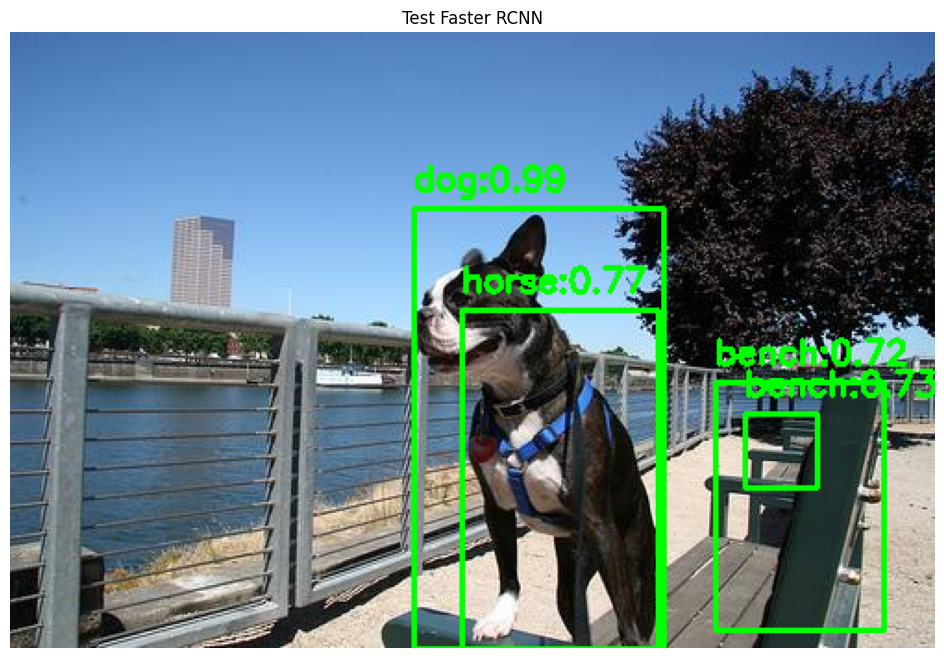

In [6]:
model = torchvision.models.detection.fasterrcnn_resnet50_fpn(pretrained=True)
model.to(DEVICE)

transform = T.Compose([T.ToTensor()])

def show_image_with_boxes(image, boxes, labels, scores, title, threshold=0.7):
    image = np.array(image)
    for box, label, score in zip(boxes, labels, scores):
        if score < threshold:
            continue
        xmin, ymin, xmax, ymax = box.astype(int)
        cv2.rectangle(image, (xmin, ymin), (xmax, ymax), (0, 255, 0), 2)
        cv2.putText(image, f"{label}:{score:.2f}", (xmin, ymin-10), cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0,255,0), 2)
    plt.figure(figsize=(12,8))
    plt.imshow(image)
    plt.title(title)
    plt.axis('off')
    plt.show()

img_path = "/content/StanfordDogs_final/Images/Bull/n02096585_1143.jpg"
img = Image.open(img_path).convert("RGB")

transform = T.Compose([T.ToTensor()])
img_t = transform(img).to(DEVICE)

# Prediction
model.eval()
with torch.no_grad():
    pred = model([img_t])[0]

boxes = pred['boxes'].cpu().numpy()
labels = pred['labels'].cpu().numpy()
scores = pred['scores'].cpu().numpy()

COCO_INSTANCE_CATEGORY_NAMES = [
    '__background__', 'person', 'bicycle', 'car', 'motorcycle', 'airplane', 'bus',
    'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'street sign',
    'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse',
    'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'hat', 'backpack',
    'umbrella', 'shoe', 'eye glasses', 'handbag', 'tie', 'suitcase', 'frisbee',
    'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove',
    'skateboard', 'surfboard', 'tennis racket', 'bottle', 'plate', 'wine glass',
    'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich',
    'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair',
    'couch', 'potted plant', 'bed', 'mirror', 'dining table', 'window', 'desk',
    'toilet', 'door', 'tv', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone',
    'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'blender', 'book',
    'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush',
    'hair brush'
]

# Print with the name of each present class
labels_names = [COCO_INSTANCE_CATEGORY_NAMES[i] for i in labels]

show_image_with_boxes(img, boxes, labels_names, scores, "Test Faster RCNN")

### Seeing how far one may resize images without losing caracteristics on dog breeds

(500, 333)
torch.Size([3, 250, 250])


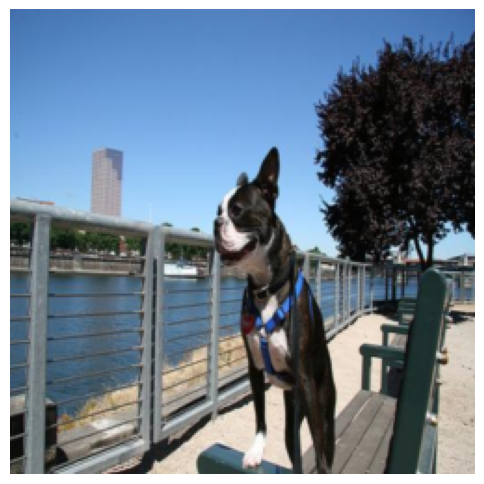

In [18]:
print(img.size)

# Transformation : resize + ToTensor
transform = T.Compose([
    T.Resize((250, 250)),
    T.ToTensor()
])

img_t = transform(img)  # Tensor C,H,W
print(img_t.shape)

img_np = img_t.permute(1, 2, 0).numpy()
plt.figure(figsize=(6, 12))
plt.imshow(img_np)
plt.axis("off")
plt.show()

### Definition of the Dataset ###

In [19]:
class StanfordDogsDataset(Dataset):
    def __init__(self, root, transforms):
        """
        root: dossier racine du dataset Stanford Dogs
            root/Images -> images .jpg
            root/Annotation -> annotations XML
        """
        self.root = root
        self.transforms = transforms

        self.img = []
        for subdir, _, files in os.walk(os.path.join(root, "Images")):
            for f in files:
                if f.lower().endswith(".jpg"):
                    self.img.append(os.path.join(subdir, f))
        self.img = sorted(self.img)

        self.ann = []
        for subdir, _, files in os.walk(os.path.join(root, "Annotation")):
            for f in files:
                if f.lower():
                    self.ann.append(os.path.join(subdir, f))
        self.ann = sorted(self.ann)

        image_root = os.path.join(root, "Images")

        # Mapping
        self.classes = sorted(os.listdir(image_root))
        self.class_to_idx = {cls_name: idx+1 for idx, cls_name in enumerate(self.classes)}
        # 0 is for background

        self.group_mapping = {
          # Bull
          "Boston_bull": 1, "French_bulldog": 1, "pug": 1, "Brabancon_griffon": 1,
          # Levrier
          "borzoi": 2, "Italian_greyhound": 2, "whippet": 2, "Saluki": 2,
          # Retriever
          "flat-coated_retriever": 3, "golden_retriever": 3, "Labrador_retriever": 3, "Chesapeake_Bay_retriever": 3,
          # Terrier
          "cairn": 4, "Australian_terrier": 4, "Norfolk_terrier": 4, "Norwich_terrier": 4,
        }

    def __len__(self):
        return len(self.img)

    def __getitem__(self, idx):
        img_path = os.path.join(self.root, "Images", self.img[idx])
        ann_path = os.path.join(self.root, "Annotation", self.ann[idx])

        img = Image.open(img_path).convert("RGB")

        # Parse XML
        tree = ET.parse(ann_path)
        root_xml = tree.getroot()
        boxes = []
        labels = []
        iscrowd = []
        for obj in root_xml.findall("object"):
            bndbox = obj.find("bndbox")
            xmin = int(bndbox.find("xmin").text)
            ymin = int(bndbox.find("ymin").text)
            xmax = int(bndbox.find("xmax").text)
            ymax = int(bndbox.find("ymax").text)
            boxes.append([xmin, ymin, xmax, ymax])

            class_name = obj.find("name").text.strip()
            labels.append(self.group_mapping[class_name])

            iscrowd.append(0)

        boxes = torch.as_tensor(boxes, dtype=torch.float32)
        labels = torch.as_tensor(labels, dtype=torch.int64)
        iscrowd = torch.as_tensor(iscrowd, dtype=torch.int64)

        image_id = torch.tensor([idx])
        area = (boxes[:, 3] - boxes[:, 1]) * (boxes[:, 2] - boxes[:, 0])

        target = {
            "boxes": boxes,
            "labels": labels,
            "image_id": image_id,
            "area": area,
            "iscrowd": iscrowd
        }

        img = self.transforms(img)

        return img, target

In [20]:
transforms = T.Compose([T.ToTensor()])
dataset = StanfordDogsDataset("/content/StanfordDogs_final", transforms)

In [21]:
print(dataset.class_to_idx)

{'Bull': 1, 'Levrier': 2, 'Retriever': 3, 'Terrier': 4}


### Run to chose Fatser-RCNN RESNET 50 model

In [22]:
def collate_fn(batch):
    images = [item[0] for item in batch]
    targets = [item[1] for item in batch]
    return images, targets


In [23]:
n_total = len(dataset.img)
val_ratio = 0.1
test_ratio = 0.1

n_val = int(n_total * val_ratio)
n_test = int(n_total * test_ratio)
n_train = n_total - n_val - n_test

# Random split
train_dataset, val_dataset, test_dataset = random_split(dataset, [n_train, n_val, n_test])

print(f"Total: {len(dataset)}, Train: {len(train_dataset)}, Val: {len(val_dataset)}, Test: {len(test_dataset)}")

Total: 2804, Train: 2244, Val: 280, Test: 280


In [30]:
# Hyperparametres
EPOCHS = 10
BATCH_SIZE = 64

# DataLoaders
train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True, collate_fn=collate_fn)
val_loader = DataLoader(val_dataset, batch_size=BATCH_SIZE, shuffle=False, collate_fn=collate_fn)
test_loader = DataLoader(test_dataset, batch_size=BATCH_SIZE, shuffle=False, collate_fn=collate_fn)

# Model
weights = FasterRCNN_ResNet50_FPN_Weights.DEFAULT  # pre-trained on COCO
model = fasterrcnn_resnet50_fpn(weights=weights)


num_classes = len(dataset.classes) + 1
in_features = model.roi_heads.box_predictor.cls_score.in_features
model.roi_heads.box_predictor = FastRCNNPredictor(in_features, num_classes) # New head of the model

model.transform.min_size = (240,) # Force to downsize images shape
model.transform.max_size = 260

model.to(DEVICE)

for param in model.parameters():
    param.requires_grad = False

# Unfreeze layer4
for name, param in model.backbone.body.named_parameters():
    if "layer4" in name:
        param.requires_grad = True

# Unfreeze roi_heads
for param in model.roi_heads.parameters():
    param.requires_grad = True

params_to_optimize = [p for p in model.parameters() if p.requires_grad]

optimizer = torch.optim.SGD(params_to_optimize, lr=0.005, momentum=0.9, weight_decay=0.0005)


train_losses = []
val_losses = []

scaler = torch.amp.GradScaler()

for epoch in range(EPOCHS):
    model.train()
    running_loss = 0.0
    tepoch = tqdm(enumerate(train_loader), total=len(train_loader), unit="batch")
    tepoch.set_description(f"Epoch {epoch+1}/{EPOCHS} [Train]")

    for i, (images, targets) in tepoch:
        images = [img.to(DEVICE) for img in images]
        targets = [{k: v.to(DEVICE) for k, v in t.items()} for t in targets]

        with torch.amp.autocast(device_type='cuda'):
            loss_dict = model(images, targets)
            loss = sum(loss for loss in loss_dict.values())

        optimizer.zero_grad()
        scaler.scale(loss).backward()
        scaler.step(optimizer)
        scaler.update()


        running_loss += loss.item()
        tepoch.set_postfix(loss=loss.item())


    epoch_train_loss = running_loss / len(train_loader)
    train_losses.append(epoch_train_loss)

    # Validation
    # No eval mode for this model to get validation loss
    # So Dropout and BatchNorm remain... but the loss curve is still useful

    running_val_loss = 0.0
    tepoch_val = tqdm(enumerate(val_loader), total=len(val_loader), unit="batch")
    tepoch_val.set_description(f"Epoch {epoch+1}/{EPOCHS} [Val]")

    with torch.no_grad():
        for i, (images, targets) in tepoch_val:
            images = [img.to(DEVICE) for img in images]
            targets = [{k: v.to(DEVICE) for k, v in t.items()} for t in targets]

            with torch.amp.autocast(device_type='cuda'):
                loss_dict = model(images, targets)
                loss = sum(loss for loss in loss_dict.values())

            running_val_loss += loss.item()
            tepoch_val.set_postfix(loss=loss.item())

    epoch_val_loss = running_val_loss / len(val_loader)
    val_losses.append(epoch_val_loss)

    print(f"Epoch {epoch+1}/{EPOCHS} - Train Loss: {epoch_train_loss:.4f} - Val Loss: {epoch_val_loss:.4f}")

  0%|          | 0/36 [00:00<?, ?batch/s]

  0%|          | 0/5 [00:00<?, ?batch/s]

Epoch 1/10 - Train Loss: 0.4873 - Val Loss: 0.2790


  0%|          | 0/36 [00:00<?, ?batch/s]

  0%|          | 0/5 [00:00<?, ?batch/s]

Epoch 2/10 - Train Loss: 0.2402 - Val Loss: 0.1963


  0%|          | 0/36 [00:00<?, ?batch/s]

  0%|          | 0/5 [00:00<?, ?batch/s]

Epoch 3/10 - Train Loss: 0.1921 - Val Loss: 0.1738


  0%|          | 0/36 [00:00<?, ?batch/s]

  0%|          | 0/5 [00:00<?, ?batch/s]

Epoch 4/10 - Train Loss: 0.1691 - Val Loss: 0.1532


  0%|          | 0/36 [00:00<?, ?batch/s]

  0%|          | 0/5 [00:00<?, ?batch/s]

Epoch 5/10 - Train Loss: 0.1479 - Val Loss: 0.1390


  0%|          | 0/36 [00:00<?, ?batch/s]

  0%|          | 0/5 [00:00<?, ?batch/s]

Epoch 6/10 - Train Loss: 0.1358 - Val Loss: 0.1332


  0%|          | 0/36 [00:00<?, ?batch/s]

  0%|          | 0/5 [00:00<?, ?batch/s]

Epoch 7/10 - Train Loss: 0.1238 - Val Loss: 0.1220


  0%|          | 0/36 [00:00<?, ?batch/s]

  0%|          | 0/5 [00:00<?, ?batch/s]

Epoch 8/10 - Train Loss: 0.1104 - Val Loss: 0.1189


  0%|          | 0/36 [00:00<?, ?batch/s]

  0%|          | 0/5 [00:00<?, ?batch/s]

Epoch 9/10 - Train Loss: 0.1023 - Val Loss: 0.1109


  0%|          | 0/36 [00:00<?, ?batch/s]

  0%|          | 0/5 [00:00<?, ?batch/s]

Epoch 10/10 - Train Loss: 0.0941 - Val Loss: 0.1118


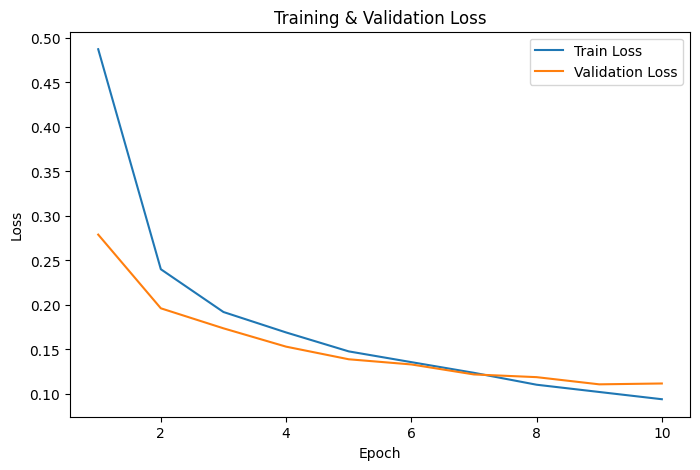

In [31]:
# Loss curves
plt.figure(figsize=(8,5))
plt.plot(range(1, len(train_losses)+1), train_losses, label='Train Loss')
plt.plot(range(1, len(val_losses)+1), val_losses, label='Validation Loss')
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Training & Validation Loss")
plt.legend()
plt.show()

### Evaluation of the model

In [26]:
class CocoEvaluator:
    def __init__(self, coco_gt, iou_types):
        assert isinstance(iou_types, (list, tuple))
        coco_gt = copy.deepcopy(coco_gt)
        self.coco_gt = coco_gt

        self.iou_types = iou_types
        self.coco_eval = {}
        for iou_type in iou_types:
            self.coco_eval[iou_type] = COCOeval(coco_gt, iouType=iou_type)

        self.img_ids = []
        self.eval_imgs = {k: [] for k in iou_types}

    def update(self, predictions):
        img_ids = list(np.unique(list(predictions.keys())))
        self.img_ids.extend(img_ids)

        for iou_type in self.iou_types:
            results = self.prepare(predictions, iou_type)
            with contextlib.redirect_stdout(io.StringIO()):
                coco_dt = COCO.loadRes(self.coco_gt, results) if results else COCO()
            coco_eval = self.coco_eval[iou_type]

            coco_eval.cocoDt = coco_dt
            coco_eval.params.imgIds = list(img_ids)
            img_ids, eval_imgs = coco_evaluate(coco_eval)

            self.eval_imgs[iou_type].append(eval_imgs)

    def synchronize_between_processes(self):
        for iou_type in self.iou_types:
            self.eval_imgs[iou_type] = np.concatenate(self.eval_imgs[iou_type], 2)
            create_common_coco_eval(self.coco_eval[iou_type], self.img_ids, self.eval_imgs[iou_type])

    def accumulate(self):
        for coco_eval in self.coco_eval.values():
            coco_eval.accumulate()

    def summarize(self):
        for iou_type, coco_eval in self.coco_eval.items():
            print(f"IoU metric: {iou_type}")
            coco_eval.summarize()

    def prepare(self, predictions, iou_type):
        if iou_type == "bbox":
            return self.prepare_for_coco_detection(predictions)
        if iou_type == "segm":
            return self.prepare_for_coco_segmentation(predictions)
        if iou_type == "keypoints":
            return self.prepare_for_coco_keypoint(predictions)
        raise ValueError(f"Unknown iou type {iou_type}")

    def prepare_for_coco_detection(self, predictions):
        coco_results = []
        for original_id, prediction in predictions.items():
            if len(prediction) == 0:
                continue

            boxes = prediction["boxes"]
            boxes = convert_to_xywh(boxes).tolist()
            scores = prediction["scores"].tolist()
            labels = prediction["labels"].tolist()

            coco_results.extend(
                [
                    {
                        "image_id": original_id,
                        "category_id": labels[k],
                        "bbox": box,
                        "score": scores[k],
                    }
                    for k, box in enumerate(boxes)
                ]
            )
        return coco_results

def convert_to_xywh(boxes):
    xmin, ymin, xmax, ymax = boxes.unbind(1)
    return torch.stack((xmin, ymin, xmax - xmin, ymax - ymin), dim=1)

def merge(img_ids, eval_imgs):
    import torch.distributed as dist

    def is_dist_avail_and_initialized():
        if not dist.is_available():
            return False
        if not dist.is_initialized():
            return False
        return True

    def get_world_size():
        if not is_dist_avail_and_initialized():
            return 1
        return dist.get_world_size()

    def all_gather(data):
        world_size = get_world_size()
        if world_size == 1:
            return [data]
        data_list = [None] * world_size
        dist.all_gather_object(data_list, data)
        return data_list

    all_img_ids = all_gather(img_ids)
    all_eval_imgs = all_gather(eval_imgs)

    merged_img_ids = []
    for p in all_img_ids:
        merged_img_ids.extend(p)

    merged_eval_imgs = []
    for p in all_eval_imgs:
        merged_eval_imgs.append(p)

    merged_img_ids = np.array(merged_img_ids)
    merged_eval_imgs = np.concatenate(merged_eval_imgs, 2)

    # Keep only unique (and in sorted order) images.
    merged_img_ids, idx = np.unique(merged_img_ids, return_index=True)
    merged_eval_imgs = merged_eval_imgs[..., idx]

    return merged_img_ids, merged_eval_imgs

def create_common_coco_eval(coco_eval, img_ids, eval_imgs):
    img_ids, eval_imgs = merge(img_ids, eval_imgs)
    img_ids = list(img_ids)
    eval_imgs = list(eval_imgs.flatten())

    coco_eval.evalImgs = eval_imgs
    coco_eval.params.imgIds = img_ids
    coco_eval._paramsEval = copy.deepcopy(coco_eval.params)

def coco_evaluate(imgs):
    with contextlib.redirect_stdout(io.StringIO()):
        imgs.evaluate()
    return imgs.params.imgIds, np.asarray(imgs.evalImgs).reshape(-1, len(imgs.params.areaRng), len(imgs.params.imgIds))

In [27]:
def convert_to_coco_api(ds):
    coco_ds = COCO()
    # Annotation IDs need to start at 1, not 0, see torchvision issue #1530.
    ann_id = 1
    dataset = {"images": [], "categories": [], "annotations": [],
               # Add a placeholder 'info' dictionary
               "info": {"description": "Converted dataset", "version": "1.0", "year": 2023,
                        "date_created": "2023/01/01"}}
    categories = set()
    for img_idx in range(len(ds)):
        # Find better way to get target.
        # targets = ds.get_annotations(img_idx)
        img, targets = ds[img_idx]
        image_id = targets["image_id"].item()
        img_dict = {}
        img_dict["id"] = image_id
        img_dict["height"] = img.shape[-2]
        img_dict["width"] = img.shape[-1]
        dataset["images"].append(img_dict)
        bboxes = targets["boxes"]
        bboxes[:, 2:] -= bboxes[:, :2]
        bboxes = bboxes.tolist()
        labels = targets["labels"].tolist()
        areas = targets["area"].tolist()
        iscrowd = targets["iscrowd"].tolist()
        num_objs = len(bboxes)
        for i in range(num_objs):
            ann = {}
            ann["image_id"] = image_id
            ann["bbox"] = bboxes[i]
            ann["category_id"] = labels[i]
            categories.add(labels[i])
            ann["area"] = areas[i]
            ann["iscrowd"] = iscrowd[i]
            ann["id"] = ann_id
            dataset["annotations"].append(ann)
            ann_id += 1
    dataset["categories"] = [{"id": i} for i in sorted(categories)]
    coco_ds.dataset = dataset
    coco_ds.createIndex()
    return coco_ds

def get_coco_api_from_dataset(dataset):
    for _ in range(10):
        if isinstance(dataset, torchvision.datasets.CocoDetection):
            break
        if isinstance(dataset, torch.utils.data.Subset):
            dataset = dataset.dataset
    if isinstance(dataset, torchvision.datasets.CocoDetection):
        return dataset.coco
    return convert_to_coco_api(dataset)

### Quantitative results

In [28]:
def evaluate(model, data_loader, device):
    n_threads = torch.get_num_threads()
    torch.set_num_threads(1)
    cpu_device = torch.device("cpu")

    coco = get_coco_api_from_dataset(data_loader.dataset)
    coco_evaluator = CocoEvaluator(coco, ["bbox"])
    model.eval()

    for images, targets in data_loader:
        images = list(img.to(device) for img in images)

        if torch.cuda.is_available():
            torch.cuda.synchronize()
        model_time = time.time()

        with torch.no_grad():
            outputs = model(images)

        outputs = [{k: v.to(cpu_device) for k, v in t.items()} for t in outputs]
        model_time = time.time() - model_time

        res = {target["image_id"].item(): output for target, output in zip(targets, outputs)}
        evaluator_time = time.time()
        coco_evaluator.update(res)
        evaluator_time = time.time() - evaluator_time

    coco_evaluator.synchronize_between_processes()

    # Accumulate predictions from all images.
    coco_evaluator.accumulate()
    coco_evaluator.summarize()
    torch.set_num_threads(n_threads)

    return coco_evaluator

evaluate(model, test_loader, DEVICE)

creating index...
index created!
Accumulating evaluation results...
DONE (t=0.04s).
IoU metric: bbox
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.672
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.916
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.783
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = -1.000
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.237
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.687
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.701
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.765
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.765
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = -1.000
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.350
 Average Recall  

### Qualitative results

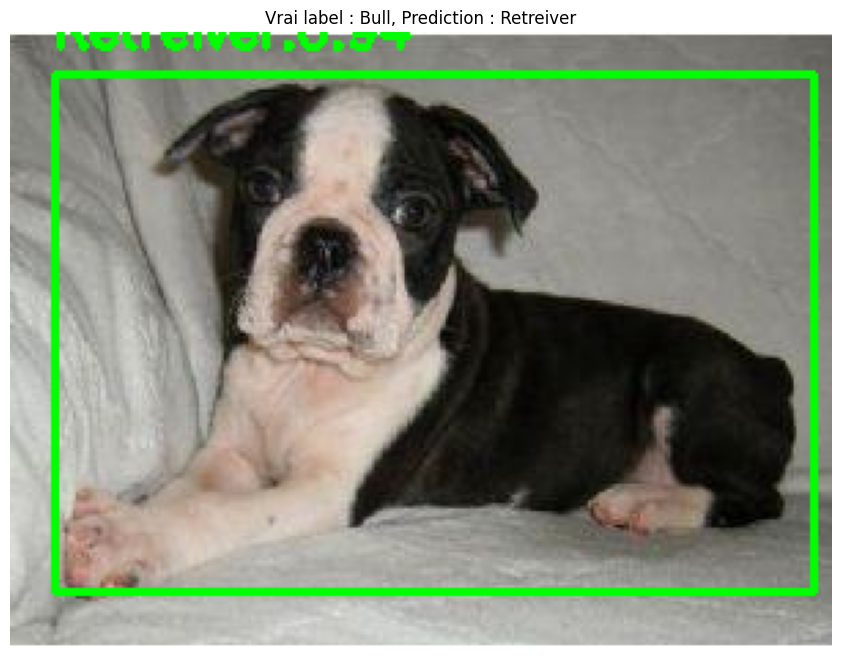

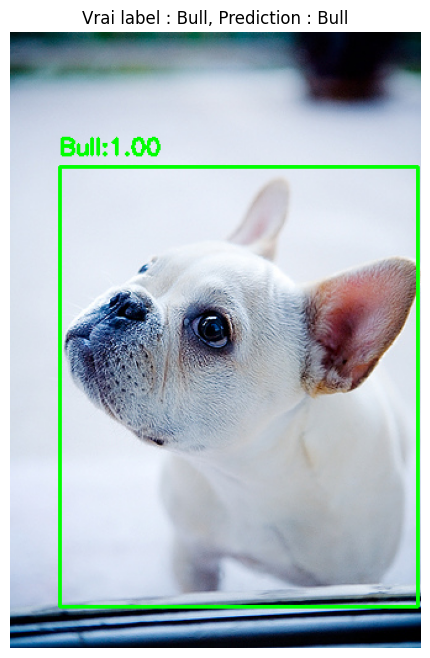

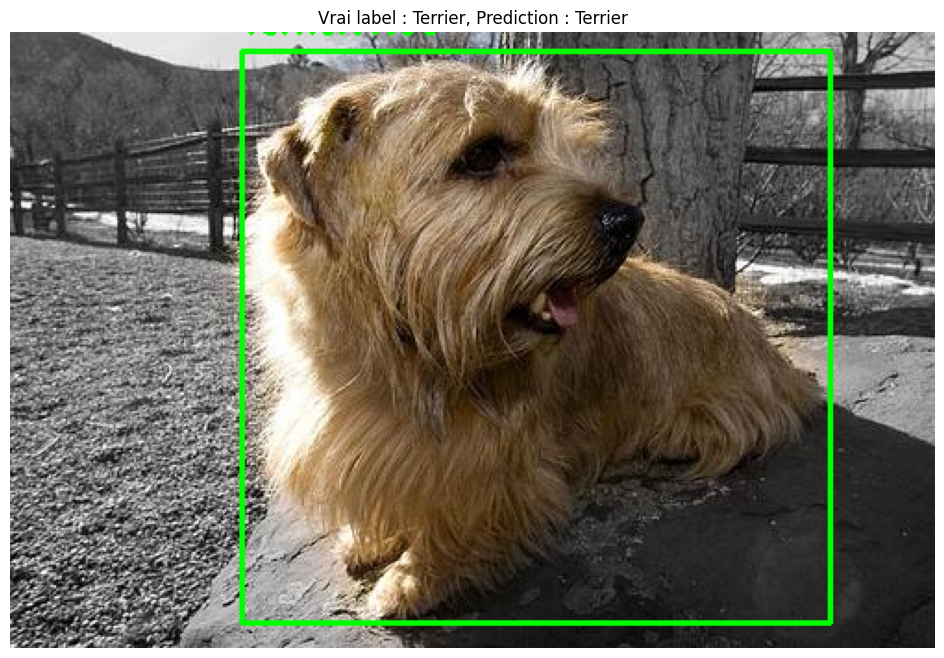

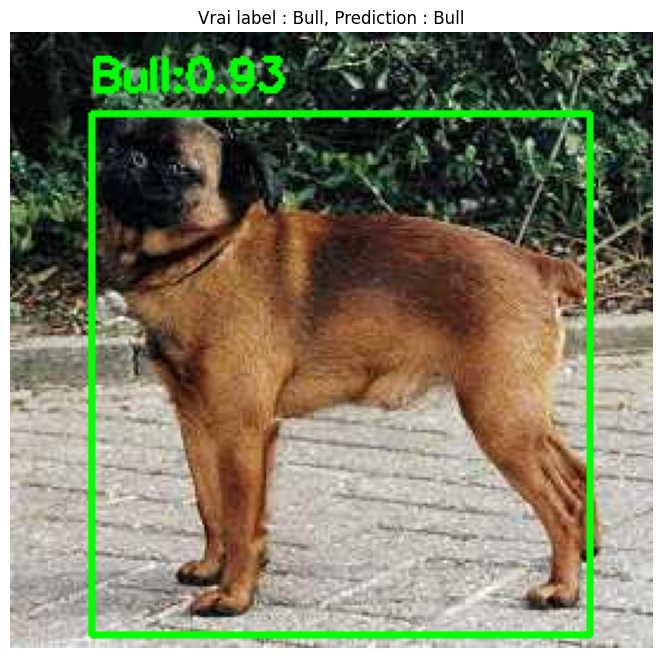

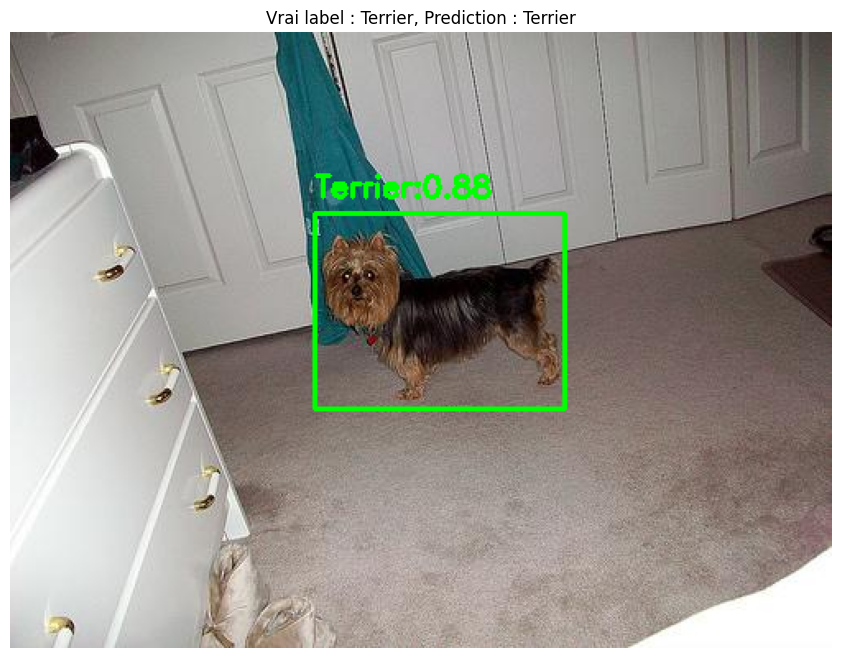

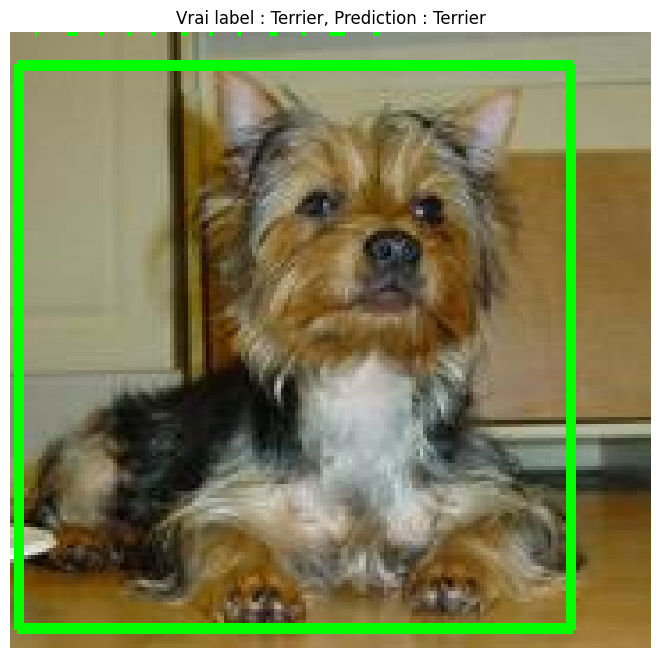

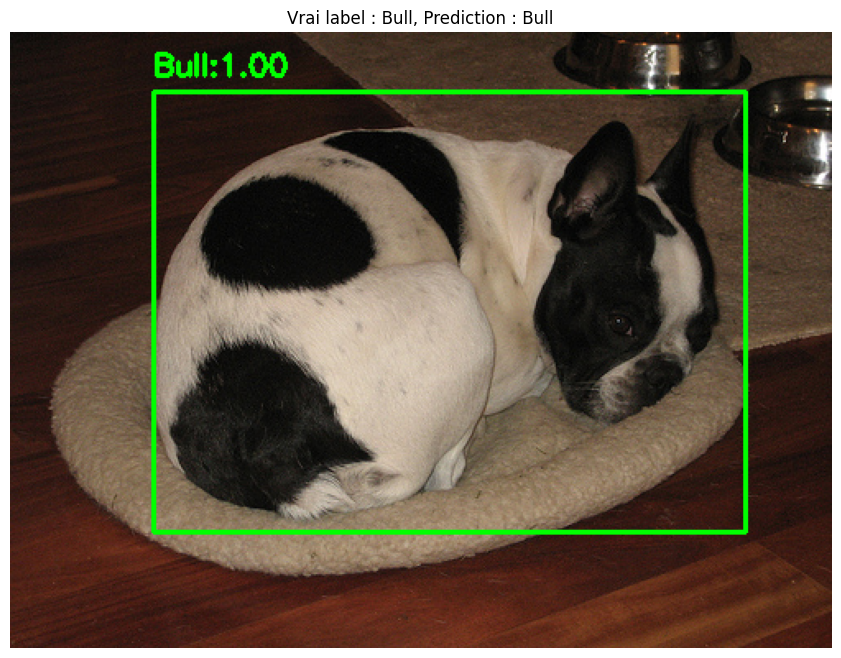

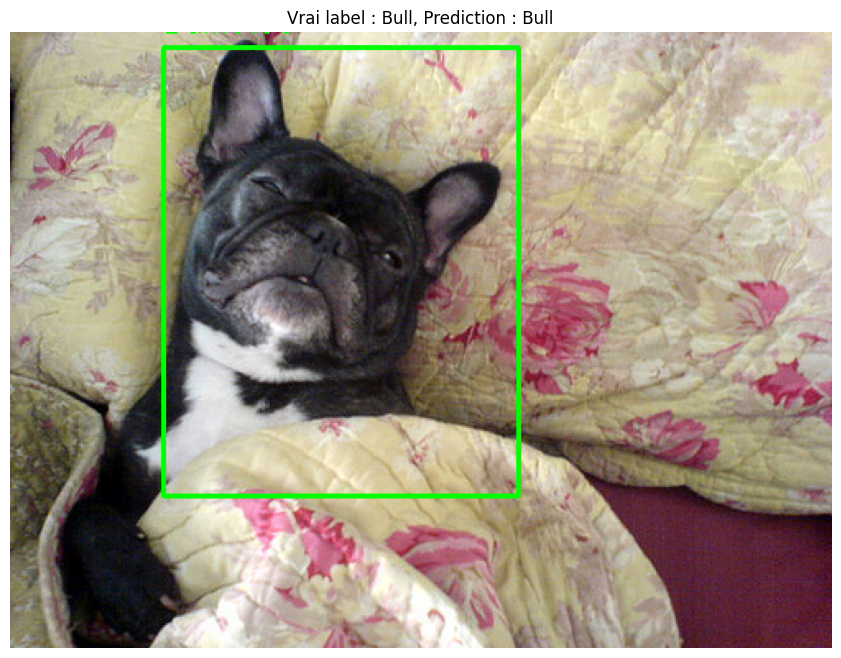

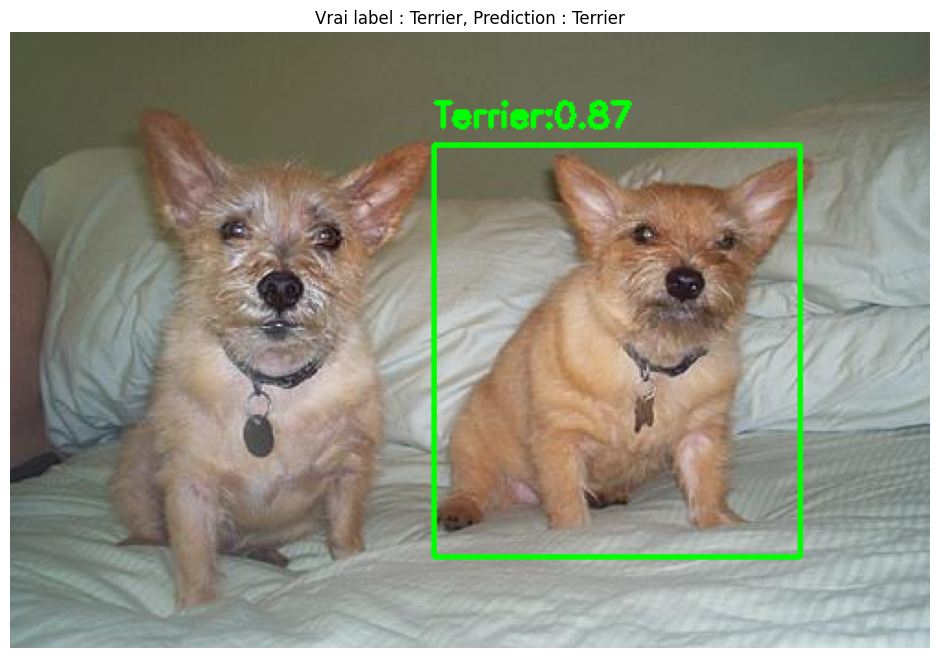

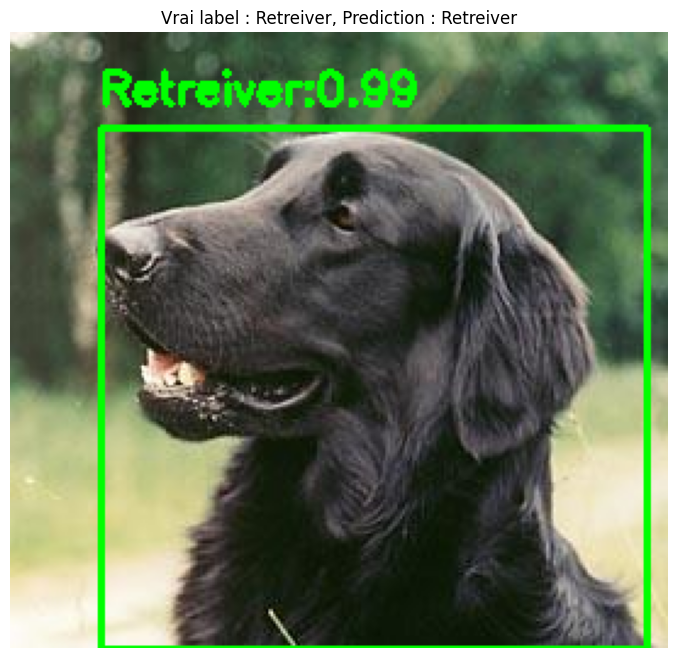

In [29]:
model.eval()

myClasses = ['__background__', 'Bull', 'Levrier', 'Retreiver', 'Terrier']

for i in range(10):

  img, target = test_dataset[i]
  img = img.to(DEVICE)

  # Prediction
  with torch.no_grad():
      pred = model([img])[0]

  boxes = pred['boxes'].cpu().numpy()
  labels = pred['labels'].cpu().numpy()
  scores = pred['scores'].cpu().numpy()

  labels_names = [myClasses[i] for i in labels]

  if len(scores) == 0:
      continue  # No prediction

  # Only print the most likely box
  best_idx = scores.argmax()

  best_box = boxes[best_idx:best_idx+1]
  best_label = [myClasses[labels[best_idx]]]
  best_score = [scores[best_idx]]

  img_display = to_pil_image(img)

  show_image_with_boxes(img_display, best_box, best_label, best_score,
                        f"Vrai label : {myClasses[target['labels'][0]]}, Prediction : {best_label[0]}", threshold=0.0)
plt.show()